# Working with the EXIOBASE EE MRIO database

## Getting EXIOBASE

EXIOBASE 1 (developed in the fp6 project EXIOPOL) and EXIOBASE 2 (outcome of the fp7 project CREEA) are available on http://www.exiobase.eu

You need to register before you can download the full dataset.

 ### EXIOBASE 1

To download EXIOBASE 1 for the use with pymrio, navigate to https://www.exiobase.eu - tab "Data Download" - "EXIOBASE 1 - full dataset" and download either 

- [pxp_ita_44_regions_coeff_txt](https://www.exiobase.eu/index.php/data-download/exiobase1-year-2000-full-data-set/49-pxp-ita-44-regions-coeff-txt/file) for the product by product (pxp) MRIO system or

- [ixi_fpa_44_regions_coeff_txt](https://www.exiobase.eu/index.php/data-download/exiobase1-year-2000-full-data-set/25-ixi-fpa-44-regions-coeff-txt/file) for the industry by industry (ixi) MRIO system or

- [pxp_ita_44_regions_coeff_src_txt](https://www.exiobase.eu/index.php/data-download/exiobase1-year-2000-full-data-set/52-pxp-ita-44-regions-coeff-src-txt/file) for the product by product (pxp) MRIO system with emission data per source or

- [ixi_fpa_44_regions_coeff_src_txt](https://www.exiobase.eu/index.php/data-download/exiobase1-year-2000-full-data-set/28-ixi-fpa-44-regions-coeff-src-txt/file) for the industry by industry (ixi) wMRIO system with emission data per source.

The links above directly lead to the required file(s), but remember that you need to be logged in to access them.

The pymrio parser works with the compressed (zip) files as well as the unpacked files. If you want to unpack the files, make sure that you store them in different folders since they unpack in the current directory.

### EXIOBASE 2

EXIOBASE 2 is available at ttp://www.exiobase.eu - tab "Data Download" - "EXIOBASE 2 - full dataset". You can download either 


- [MrIOT PxP ita coefficient version2 2 2](http://www.exiobase.eu/index.php/data-download/exiobase2-year-2007-full-data-set/79-mriot-pxp-ita-coefficient-version2-2-2/file) for the product by product (pxp) MRIO system or

- [MrIOT IxI fpa coefficient version2 2 2](http://www.exiobase.eu/index.php/data-download/exiobase2-year-2007-full-data-set/78-mriot-ixi-fpa-coefficient-version2-2-2/file) for the industry by industry (ixi) MRIO system.

The links above directly lead to the required file(s), but remember that you need to be logged in to access them.

The pymrio parser works with the compressed (zip) files as well as the unpacked files. You can unpack the files together in one directory (unpacking creates a separate folder for each EXIOBASE 2 version). The unpacking of the PxP version also creates a folder "__MACOSX" - you can delete this folder.

### EXIOBASE 3

EXIOBASE 3 is available at ttp://www.exiobase.eu - tab "Data Download" - "EXIOBASE 3 - monetary".
The EXIOBASE 3 parser works with both, the compressed zip archives and the extracted database.


## Parsing

In [1]:
import pymrio

For each publically available version of EXIOBASE pymrio provides a specific parser. 
To parse **EXIOBASE 1** use:

In [2]:
exio1 = pymrio.parse_exiobase1(path='/tmp/mrios/exio1/121016_EXIOBASE_pxp_ita_44_regions_coeff_txt.zip')

The parameter 'path' needs to point to either folder with the extracted EXIOBASE1 files for the downloaded zip file.

Similarly, **EXIOBASE 2** can be parsed by:

In [3]:
exio2 = pymrio.parse_exiobase2(path='/tmp/mrios/exio2/mrIOT_PxP_ita_coefficient_version2.2.2.zip',
                               charact=True, popvector='exio2')

The additional parameter 'charact' specifies if the characterization matrix provided with EXIOBASE 2 should be used. This can be specified with True or False; in addition, a custom one can be provided. In the latter case, pass the full path to the custom characterisatio file to 'charact'.

The parameter 'popvector' allows to pass information about the population per EXIOBASE2 country. This can either be a custom vector of, if 'exio2' is passed, the one provided with pymrio.

**EXIOBASE 3** can be parsed by:

In [ ]:
exio3 = pymrio.parse_exiobase3(path='path='/tmp/mrios/exio2/mrIOT_PxP_ita_coefficient_version2.2.2.zip'')

For the rest of the tutorial, we use *exio2*; deleting *exio1* to free some memory: 

In [4]:
del exio1

## Exploring EXIOBASE

After parsing a EXIOBASE version, the handling of the database is the same as for any IO. 
Here we use the parsed EXIOBASE2 to explore some characteristics of the EXIBOASE system.

After reading the raw files, metadata about EXIOBASE can be accessed within the meta field:

In [5]:
exio2.meta

Description: Metadata for pymrio
MRIO Name: EXIOBASE
System: pxp
Version: 2.2.2
File: None
History:
20180111 10:25:01 - FILEIO -  EXIOBASE data FY_materials parsed from /tmp/mrios/exio2/mrIOT_PxP_ita_coefficient_version2.2.2.zip/mrIOT_PxP_ita_coefficient_version2.2.2/mrFDMaterials_version2.2.2.txt
20180111 10:25:01 - FILEIO -  EXIOBASE data FY_emissions parsed from /tmp/mrios/exio2/mrIOT_PxP_ita_coefficient_version2.2.2.zip/mrIOT_PxP_ita_coefficient_version2.2.2/mrFDEmissions_version2.2.2.txt
20180111 10:25:01 - FILEIO -  EXIOBASE data S_resources parsed from /tmp/mrios/exio2/mrIOT_PxP_ita_coefficient_version2.2.2.zip/mrIOT_PxP_ita_coefficient_version2.2.2/mrResources_version2.2.2.txt
20180111 10:25:00 - FILEIO -  EXIOBASE data S_materials parsed from /tmp/mrios/exio2/mrIOT_PxP_ita_coefficient_version2.2.2.zip/mrIOT_PxP_ita_coefficient_version2.2.2/mrMaterials_version2.2.2.txt
20180111 10:24:59 - FILEIO -  EXIOBASE data S_emissions parsed from /tmp/mrios/exio2/mrIOT_PxP_ita_coefficient

Custom points can be added to the history in the meta record. For example:

In [6]:
exio2.meta.note("First test run of EXIOBASE 2")
exio2.meta

Description: Metadata for pymrio
MRIO Name: EXIOBASE
System: pxp
Version: 2.2.2
File: None
History:
20180111 10:25:02 - NOTE -  First test run of EXIOBASE 2
20180111 10:25:01 - FILEIO -  EXIOBASE data FY_materials parsed from /tmp/mrios/exio2/mrIOT_PxP_ita_coefficient_version2.2.2.zip/mrIOT_PxP_ita_coefficient_version2.2.2/mrFDMaterials_version2.2.2.txt
20180111 10:25:01 - FILEIO -  EXIOBASE data FY_emissions parsed from /tmp/mrios/exio2/mrIOT_PxP_ita_coefficient_version2.2.2.zip/mrIOT_PxP_ita_coefficient_version2.2.2/mrFDEmissions_version2.2.2.txt
20180111 10:25:01 - FILEIO -  EXIOBASE data S_resources parsed from /tmp/mrios/exio2/mrIOT_PxP_ita_coefficient_version2.2.2.zip/mrIOT_PxP_ita_coefficient_version2.2.2/mrResources_version2.2.2.txt
20180111 10:25:00 - FILEIO -  EXIOBASE data S_materials parsed from /tmp/mrios/exio2/mrIOT_PxP_ita_coefficient_version2.2.2.zip/mrIOT_PxP_ita_coefficient_version2.2.2/mrMaterials_version2.2.2.txt
20180111 10:24:59 - FILEIO -  EXIOBASE data S_emissio

To check for sectors, regions and extensions:

In [7]:
exio2.get_sectors()

Index(['Paddy rice', 'Wheat', 'Cereal grains nec', 'Vegetables, fruit, nuts',
       'Oil seeds', 'Sugar cane, sugar beet', 'Plant-based fibers',
       'Crops nec', 'Cattle', 'Pigs',
       ...
       'Paper for treatment: landfill',
       'Plastic waste for treatment: landfill',
       'Inert/metal/hazardous waste for treatment: landfill',
       'Textiles waste for treatment: landfill',
       'Wood waste for treatment: landfill',
       'Membership organisation services n.e.c.',
       'Recreational, cultural and sporting services', 'Other services',
       'Private households with employed persons',
       'Extra-territorial organizations and bodies'],
      dtype='object', name='sector', length=200)

In [8]:
exio2.get_regions()

Index(['AT', 'BE', 'BG', 'CY', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FI', 'FR', 'GR',
       'HU', 'IE', 'IT', 'LT', 'LU', 'LV', 'MT', 'NL', 'PL', 'PT', 'RO', 'SE',
       'SI', 'SK', 'GB', 'US', 'JP', 'CN', 'CA', 'KR', 'BR', 'IN', 'MX', 'RU',
       'AU', 'CH', 'TR', 'TW', 'NO', 'ID', 'ZA', 'WA', 'WL', 'WE', 'WF', 'WM'],
      dtype='object', name='region')

In [9]:
list(exio2.get_extensions())

['factor_inputs', 'emissions', 'materials', 'resources', 'impact']

## Calculating the system and extension results

The following command checks for missing parts in the system and calculates them. In case of the parsed EXIOBASE this includes A, L, multipliers M, footprint accounts, ..

In [10]:
exio2.calc_all()

## Exploring the results

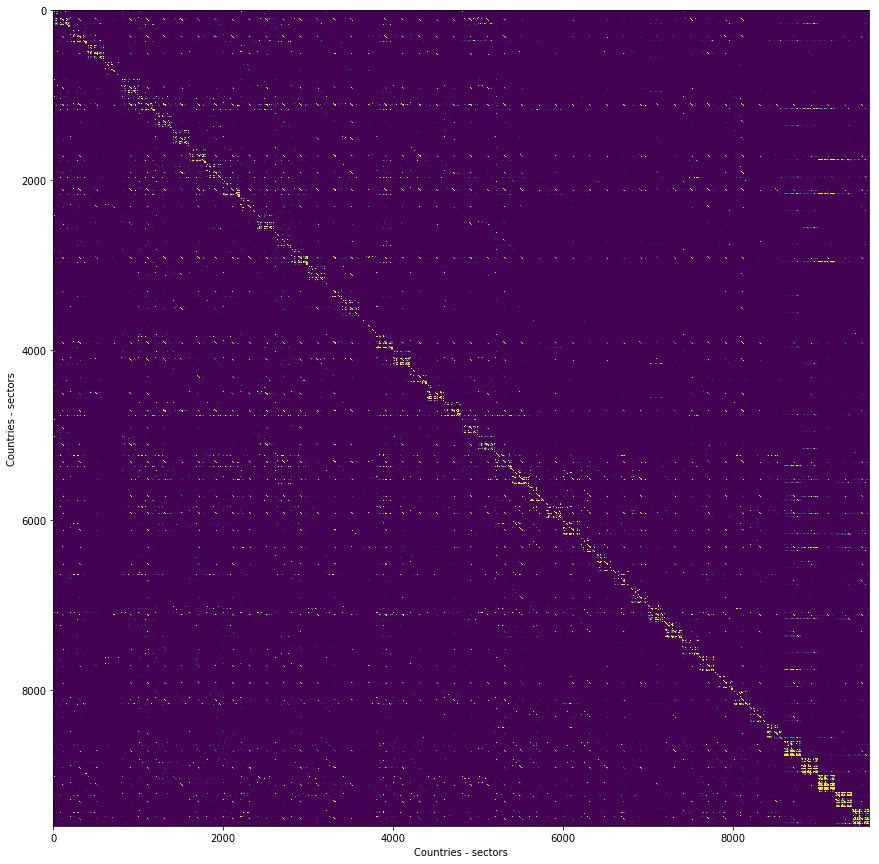

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
plt.imshow(exio2.A, vmax=1E-3)
plt.xlabel('Countries - sectors')
plt.ylabel('Countries - sectors')
plt.show()

The available impact data can be checked with:

In [12]:
list(exio2.impact.get_rows())

['Value Added',
 'Employment',
 'Employment hour',
 'abiotic depletion (elements, ultimate ultimate reserves)',
 'abiotic depletion (fossil fuels)',
 'abiotic depletion (elements, reserve base)',
 'abiotic depletion (elements, economic reserve)',
 'Landuse increase of land competition',
 'global warming (GWP100)',
 'global warming net (GWP100 min)',
 'global warming net (GWP100 max)',
 'global warming (GWP20)',
 'global warming (GWP500)',
 'ozone layer depletion (ODP steady state)',
 'ozone layer depletion (ODP5)',
 'ozone layer depletion (ODP10)',
 'ozone layer depletion (ODP15)',
 'ozone layer depletion (ODP20)',
 'ozone layer depletion (ODP25)',
 'ozone layer depletion (ODP30)',
 'ozone layer depletion (ODP40)',
 'human toxicity (HTP inf)',
 'Freshwater aquatic ecotoxicity (FAETP inf)',
 'Marine aquatic ecotoxicity (MAETP inf)',
 'Freshwater sedimental ecotoxicity (FSETP inf)',
 'Marine sedimental ecotoxicity (MSETP inf)',
 'Terrestrial ecotoxicity (TETP inf)',
 'human toxicity (HTP

And to get for example the footprint of a specific impact do:

In [13]:
print(exio2.impact.unit.loc['global warming (GWP100)'])
exio2.impact.D_cba_reg.loc['global warming (GWP100)']

unit    kg CO2 eq.
Name: global warming (GWP100), dtype: object


region
AT    1.450787e+11
BE    1.991422e+11
BG    6.266676e+10
CY    1.556996e+10
CZ    1.471491e+11
DE    1.394892e+12
DK    1.079304e+11
EE    2.381673e+10
ES    6.079175e+11
FI    1.153875e+11
FR    8.019998e+11
GR    2.247927e+11
HU    9.096635e+10
IE    9.591233e+10
IT    8.419421e+11
LT    3.366823e+10
LU    1.467799e+10
LV    2.255212e+10
MT    5.014763e+09
NL    2.992112e+11
PL    4.136385e+11
PT    1.120749e+11
RO    1.543358e+11
SE    1.282029e+11
SI    3.239223e+10
SK    6.911104e+10
GB    1.073548e+12
US    7.591895e+12
JP    1.825128e+12
CN    6.986984e+12
CA    7.142173e+11
KR    7.566406e+11
BR    5.595118e+11
IN    1.658771e+12
MX    6.219372e+11
RU    1.635710e+12
AU    5.715893e+11
CH    1.201448e+11
TR    4.939783e+11
TW    2.924074e+11
NO    8.791708e+10
ID    4.552600e+11
ZA    3.547961e+11
WA    1.224565e+12
WL    7.970228e+11
WE    4.931660e+11
WF    6.100073e+11
WM    1.329488e+12
Name: global warming (GWP100), dtype: float64

## Visualizing the data

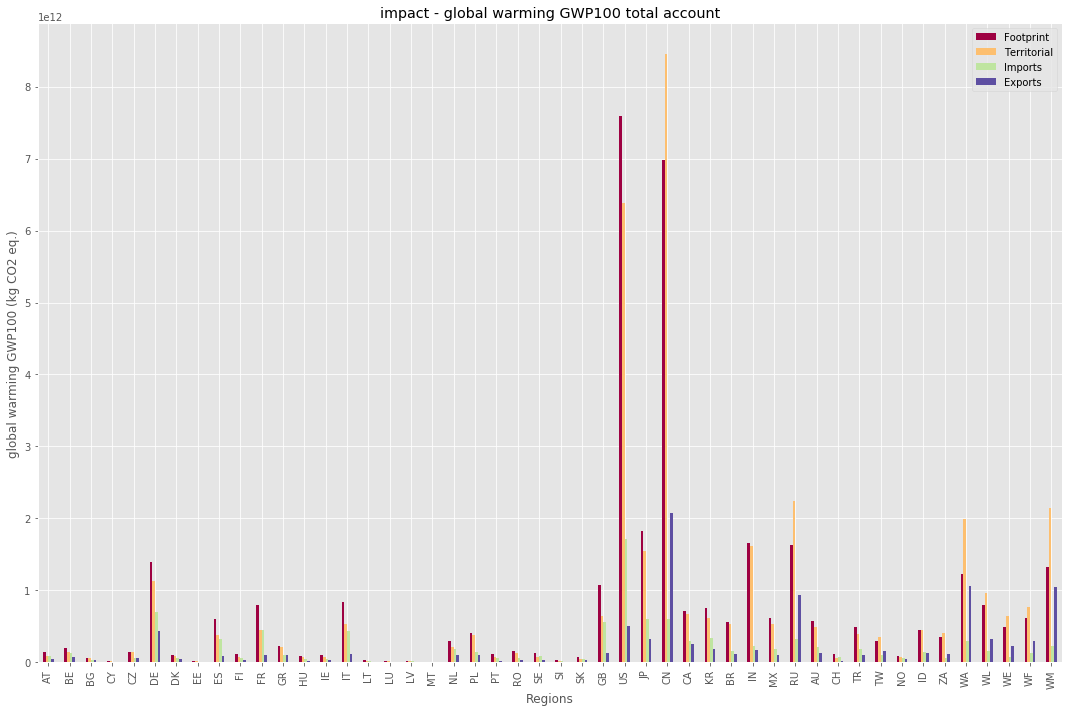

In [14]:
with plt.style.context('ggplot'):
    exio2.impact.plot_account(['global warming (GWP100)'], figsize=(15,10))
    plt.show()

See the other notebooks for further information on [aggregation](../notebooks/aggregation_examples.ipynb) and [file io](../notebooks/load_save_export.ipynb).